# SeqIO

Manipulating nucleotide and protein sequences
- manipulating simple files (e.g., FASTA files) 
- mainpulating files with rich meta data annotation (genbank file format)

Biopython has an API for IO of sequences (__Bio.SeqIO__) and __Bio.SeqRecord__ for accessing richly annoted data

## The SeqIO object
- supports different file formats
- for example: clustal(aln), genbank(gb), pir, embl, fasta, ...
- see [SeqIO wiki](http://biopython.org/wiki/SeqIO) for more information


SeqIO provides four functions: 
- __parse()__: iteratively parse all elements in the file
- __read()__: parse a one-element file and return the element
- __write()__: write elements to a file
- __convert()__: parse one format and immediately write another

SeqIO manipulates sequences as __Seqrecord__ objects
Alignments (Bio.AlignIo), Blast results (Bio.Blast), and phylogenetic trees(Bio.Phylo) use the same input/output conventions

## The SeqRecord object
SeqRecord is a common object for sequence file entries
- wraps a __Seq__ object
- attaches _metadata_ (like identifiers and annotation)
- Suitable for richly annotated sequence (like data from gb and embl files)


### Attributes of a SeqRecord object:
- __seq__ the sequence itself, typically (Bio.Seq) object
- __id__ primary ID for the sequence (string), typically an accession number
- __name__ "common" name for the sequence (LOCUS id in gb files)
- __description__ human-readible description of the sequence
- __letter_annotations__ dictionary of additional info about individual letters in the sequence (like quality scores, secondary structure information)
- __annotations__ dictionary of additional unstructured info
- __features__ list of __SeqFeature__ objects with more structured information (like position of genes on a genome and domains on  a protein sequence)
- __dbxrefs__ list of database cross-references(strings)

### Creation of SeqRecord objects:
#### 1.) From scratch: directly setting the attributes:


In [1]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
simple_seq = Seq("GATC")
simple_seq_r = SeqRecord(simple_seq)
simple_seq_r.id = "AC12345" # id is important for outputting the record to a file
print(simple_seq_r) # all other attributes are empty or unknown

# set annotations (is a python dictionary)
simple_seq_r.annotations["evidence"] = "None. I just made it up."
print(simple_seq_r.annotations)

ID: AC12345
Name: <unknown name>
Description: <unknown description>
Number of features: 0
Seq('GATC')
{'evidence': 'None. I just made it up.'}


#### 2.) From a sequence file 
### Bio.SeqIO.parse():
1. Open the sequence file to obtain a handle
2. Pass the handle to SeqIO.parse():
   Arguments:
     - file handle or file name
     - file format (explicit specification)
     - alphabet (optional)
   Output: SeqRecord iterator
3. Close the sequence file 
4. Display the content of the sequence records (via the iterator)

__Note__: In python it is good practice to open files with the "with" statement to create a context manager. This has the advantage, that the file is properly closed (even if an exception was thrown). See [python's documentation on with](https://docs.python.org/3.5/reference/datamodel.html#context-managers) for more information.

In [3]:
from Bio import SeqIO
with open("data/1ATP_ncbi.fasta", "r") as in_file:
    seq_rec_it = SeqIO.parse(in_file, "fasta")   
    
    # iterate through the records 
    for rec in seq_rec_it:
        print(rec.id, len(rec.seq), rec.seq[:10] + "...")


gi|349840|pdb|1ATP|I 20 TTYADFIASG...
gi|334878378|pdb|1ATP|E 350 GNAAAAKKGS...


In [4]:
# or generate a list of record iterators
with open("data/1ATP_ncbi.fasta", "r") as in_file:
   
    recs = list(SeqIO.parse(in_file, "fasta"))
    # and print only the first record
    print(recs[0].id, len(recs[0].seq), recs[0].seq[:10] + "...") 

gi|349840|pdb|1ATP|I 20 TTYADFIASG...


In [5]:
# or for small files, generate a dictionary from the input file
with open("data/1ATP_ncbi.fasta", "r") as in_file:
    rec_dict = SeqIO.to_dict(SeqIO.parse(in_file, "fasta"))
    # print the keys of the dictionary
    print(rec_dict.keys())

dict_keys(['gi|349840|pdb|1ATP|I', 'gi|334878378|pdb|1ATP|E'])



### Bio.SeqIO.read():
- Same arguments as Bio.SeqIO.parse()
- use it when you know, that your file only contains one record!
- returns a single Bio.SeqRecord object

Example: Parsing a genbank file with rich text format

In [6]:
from Bio import SeqIO

# using SeqIO's parse method to get the length of the sequence of the record
print(sum([len(r) for r in SeqIO.parse("data/single_record.gbk", "genbank")]))

# using SeqIO's read method to get the length of the sequence 
record = SeqIO.read("data/single_record.gbk", "genbank")
print(len(record.seq))

print(record)

9609
9609
ID: NC_005816.1
Name: NC_005816
Description: Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence
Database cross-references: Project:58037
Number of features: 41
/molecule_type=DNA
/topology=circular
/data_file_division=BCT
/date=21-JUL-2008
/accessions=['NC_005816']
/sequence_version=1
/gi=45478711
/keywords=['']
/source=Yersinia pestis biovar Microtus str. 91001
/organism=Yersinia pestis biovar Microtus str. 91001
/taxonomy=['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Enterobacteriales', 'Enterobacteriaceae', 'Yersinia']
/references=[Reference(title='Genetics of metabolic variations between Yersinia pestis biovars and the proposal of a new biovar, microtus', ...), Reference(title='Complete genome sequence of Yersinia pestis strain 91001, an isolate avirulent to humans', ...), Reference(title='Direct Submission', ...), Reference(title='Direct Submission', ...)]
/comment=PROVISIONAL REFSEQ: This record has not yet been subject to final
NCBI re

## Bio.SeqIO API: writing into a file
### Bio.SeqIO.write():
- Arguments: SeqRecord-s, file handle (file name), file format
- Output: number of written records

In [16]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
seq_r = SeqRecord(Seq("GATC"))
#print(SeqIO.write(seq_r, "data/output/gatc.fasta", "fasta"))
print(SeqIO.write(seq_r, "data/output/gatc.fasta", "fasta"))

1


### Bio.SeqIO.convert():
- Arguments: file name, converted file name, file format
- Output: number of converted records


In [17]:
count = SeqIO.convert("data/single_record.gbk", "genbank", "data/output/conversion.fasta", "fasta")
print("Number of converted records: ", count)

Number of converted records:  1


## Bio.SeqIO API: Analysing sequence files

Statistics:

In [18]:
sizes = [len(r) for r in SeqIO.parse("data/example1.fasta", "fasta")]
print(len(sizes), min(sizes), max(sizes))
print(sizes)

7 893 902
[902, 899, 899, 895, 893, 894, 896]


### Example: Plotting a histogram of sequence lengths: 

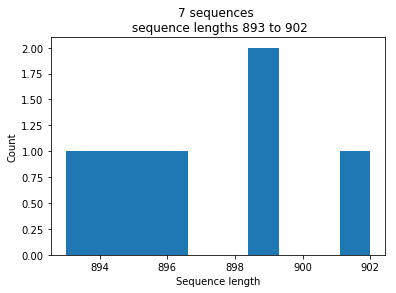

In [20]:
from matplotlib import pyplot as plt
plt.hist(sizes, bins = 10)
plt.title("{0} sequences \n sequence lengths {1} to {2}".format(len(sizes), min(sizes), max(sizes)))
plt.xlabel("Sequence length")
plt.ylabel("Count")
plt.show()

### Plotting GC content over all sequences:

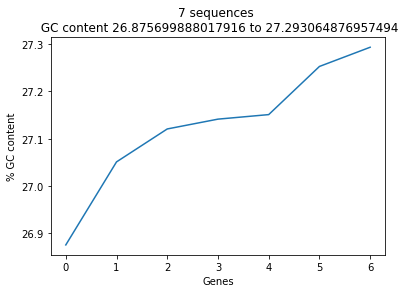

In [21]:
from Bio.SeqUtils import GC
val = sorted(GC(r.seq) for r in SeqIO.parse("data/example1.fasta", "fasta"))
plt.plot(val)
plt.title("{0} sequences \n GC content {1} to {2}".format(len(val), min(val), max(val)))
plt.xlabel("Genes")
plt.ylabel("% GC content")
plt.show()

# AlignIO

## Alignment
- Set of sequences with the __same length __ and __alphabet__
- Different formats, e.g., clustal, stockholm and fasta

## Bio.AlignIO
- Multiple sequence alignment input / output interface
- One/ more sequence alignments represented as alignment objects
- Bio.SeqIO names for supported file formats and API

In [22]:
from Bio import AlignIO
aln = AlignIO.read("data/msa2.aln", "clustal")
print(aln)

SingleLetterAlphabet() alignment with 20 rows and 411 columns
--------------------------------------------...--- gi|14150838|gb|AAK54648.1|AF37
MTVLEESADASSRRLAQRANGPATVLAIGTANPANVFEQSSYPD...--- gi|12644515|sp|Q9MBB1|CHSY_EQU
------MVTVEEVRKAQRAEGPATILAIGTATPANCVDQSTYPD...--- gi|13774971|gb|AAK39113.1|AF35
------MVTVEEVRKAQRAEGPATILAIGTATPANCVDQSTYPD...--- gi|13774967|gb|AAK39111.1|AF35
------MVTVEEVRKAQRAEGPATILAIGTATPANCVDQSTYPD...--- gi|13774975|gb|AAK39115.1|AF35
------MVTVEEVRKAQRAEGPATILAIGTATPANCVDQSTYPD...--- gi|13774965|gb|AAK39110.1|AF35
------MVTVEEVRKAQRAEGPATILAIGTATPANCVDQSTYPD...--- gi|13774973|gb|AAK39114.1|AF35
------MVTVEEVRKAQRAEGPATILAIGTATPANCVDQSTYPD...--- gi|13774969|gb|AAK39112.1|AF35
-----------------------------------------YPD...--- gi|13919613|gb|AAK33142.1|
-----------------------------------------YPD...--- gi|13919597|gb|AAK33134.1|
------MVTVEEFRRAQCAEGPATVMAIGTATPSNCVDQSTYPD...--- gi|13925890|gb|AAK49457.1|
------MVTVEEVRKAQRAEGPATILAIGTVTPANCVNQSTYPD...P

In [23]:
aln

<<class 'Bio.Align.MultipleSeqAlignment'> instance (20 records of length 411, SingleLetterAlphabet()) at 112e8ff0>

### Alignment input
- Functions: read(), parse()
- Arguments: file handle, file format, seq_count, alphabet
- Output: (iterator to) MultipleSeqAlignment object(s)

In [24]:
aln1 = AlignIO.read("data/msa_pk_seed.sth", "stockholm")
print("Alignment length: ", aln1.get_alignment_length())

Alignment length:  76


In [25]:
for raln in aln1:
    print(raln.seq[:5] + "..." + raln.seq[50:], "\t",  raln.id)

TDVEP...DDGEQGGESSSSTDPPKESTEGAKTE 	 Q5SPN9_DANRE/2-74
MEVES...AEGQAEGSTPDKEASSQPESSDANTS 	 IPKG_MOUSE/2-75
MDVEA...AEGTA-GASPAPEAEAPPATMPRELE 	 Q4S692_TETNG/2-76
TDVES...SEGDENEKENPSDKTPEEKNQAPKPE 	 Q5BKM1_XENTR/2-75
TDVES...AEGEGDAQRNPSEQTGEAQGEAAKQE 	 IPKA_CHICK/2-75
TDVET...TEGEDDGQRSSTEQSGEAQGEAAKSE 	 IPKA_RAT/2-75
TDVEP...EDVKKKDEETAQDQLEKPKDEG---K 	 Q0VCK2_BOVIN/9-79
TDVES...EDAKTKNEEKDQGQPKTPLNEG---K 	 IPKB_MOUSE/23-92
TDVES...EDAKEKDEKTTQDQLEKPQNEE---K 	 Q5T0Z7_HUMAN/16-85


In [26]:
# parsing a stockholm (PFAM) format (containing rich annotation)
aln2 = AlignIO.read("data/msa_pk_rp15.sth", "stockholm")
print("Alignment length: ", aln2.get_alignment_length())

Alignment length:  105


In [27]:
for i, raln in enumerate(aln2):
    tmp =""
    if raln.dbxrefs:
        tmp = raln.dbxrefs[0]
    if i < 9:
        print(raln.seq[:5] + "..." + raln.seq[76:],"\t", raln.id, "\t", tmp)

----K...----------STNLGPN------------ 	 E9HLU5_DAPPU/20-78 	 
EVPER...----------GPSPPKQGTS--------- 	 Q564X6_CAEEL/5-72 	 
-AEVA...SS--------QADSQG------------- 	 C3YMU2_BRAFL/41-115 	 
-----...----------VEEIALIMSAQNSENNF-- 	 H9J1P3_BOMMO/5-69 	 
-ETDE...TSKQQ-----G------------------ 	 H9KE77_APIME/84-150 	 
-TTED...----------TDS---------------- 	 A8PSX9_BRUMA/15-79 	 
----P...TSE-------GPPKS-------------- 	 B7P5W6_IXOSC/16-86 	 
-----...QPQSSD----GTTS--------------- 	 IPKG_HUMAN/2-75 	 
-----...EAQGEAAKSE------------------- 	 IPKA_HUMAN/2-75 	 PDB; 2UW5 I; 5-24;


### Alignment output
- Formatted output to a file 
- Functions: write()
- Arguments: alignment-s, file handle, file format




In [28]:
from Bio.Alphabet import generic_dna
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio import AlignIO

# create the alignment objects from scratch
al1 = MultipleSeqAlignment([
        SeqRecord(Seq("ACTGCTAGCTAG", generic_dna), id = "id1"),
        SeqRecord(Seq("ACT-CTAGCTAG", generic_dna), id = "id2"),])

al2 = MultipleSeqAlignment([
        SeqRecord(Seq("GTCAGC-AG", generic_dna), id = "id3"),
        SeqRecord(Seq("GACAGCTAG", generic_dna), id = "id4")])

# make a list wut tge alignment objects
alignments = [al1, al2]
print("Number of written Alignments: ", AlignIO.write(alignments, "data/output/alignments.fasta", "fasta"))

Number of written Alignments:  2


In [29]:
# get the alignment in clustal format
print(aln1.format("clustal"))

CLUSTAL X (1.81) multiple sequence alignment


Q5SPN9_DANRE/2-74                   TDVEPVVSDFAATGRTGRRNALPDILG-STAGPGA-ADLPDKLAELTV-G
IPKG_MOUSE/2-75                     MEVESSYSDFISCDRTGRRNAVPDIQGDSEAV--SVRKLAGDMGELALEG
Q4S692_TETNG/2-76                   MDVEASYSDFINCDRTGRRNAVPDITREGEQVPASTSELAKDMAEMDLKA
Q5BKM1_XENTR/2-75                   TDVESTYADFIASGRTGRRNALHDILV-SSSSGNT-SELALKLSELDISK
IPKA_CHICK/2-75                     TDVESTYADFIASGRTGRRNALHDILV-SSPGGNS-SELALKLSELDINK
IPKA_RAT/2-75                       TDVETTYADFIASGRTGRRNAIHDILV-SSASGNS-NELALKLAGLDINK
Q0VCK2_BOVIN/9-79                   TDVEPVVNNFASSARAGRRNAVPDIQG-STAAGGTLEELPVKLEALSV-K
IPKB_MOUSE/23-92                    TDVESVITSFASSARAGRRNALPDIQS-SLATSGS-SDLPLKLEALAV-K
Q5T0Z7_HUMAN/16-85                  TDVESGVANFASSARAGRRNALPDIQS-SAATDGT-SDLPLKLEALSV-K

Q5SPN9_DANRE/2-74                   DDGEQGGESSSSTDPPKESTEGAKTE
IPKG_MOUSE/2-75                     AEGQAEGSTPDKEASSQPESSDANTS
Q4S692_TETNG/2-76                   AEGTA-G

In [30]:
# File format conversions
count = AlignIO.convert("data/msa_pk_seed.sth", "stockholm", "data/output/msa_pk_seed.aln", "clustal")
print("Converted alignments: ", count)

# or via AlignIO.read() and AlignIO.write() methods:
alnc = AlignIO.parse("data/msa_pk_seed.sth", "stockholm")
count2 = AlignIO.write(alnc, "data/output/ms_pk_seed.aln", "clustal")

Converted alignments:  1


### Manipulating alignments

In [31]:
alnc = AlignIO.read("data/msa_pk_seed.sth", "stockholm")
print(alnc)
print("___________________________________________________________________________")

# get the number of rows
print(len(alnc))
print("___________________________________________________________________________")

# Access a single sequence letter: Numpy indexing
print(alnc[2,7]) # or pythonic alnc[2].seq[6]
print("___________________________________________________________________________")

# get a single column as a string
print(alnc[:,7])
print("___________________________________________________________________________")

# get a single row as a string and print it with its id
print(alnc[2].seq, alnc[2].id)
print("___________________________________________________________________________")

# remove a block of columns 
print(alnc[:3,:5] + alnc[:3,70:])

SingleLetterAlphabet() alignment with 9 rows and 76 columns
TDVEPVVSDFAATGRTGRRNALPDILG-STAGPGA-ADLPDKLA...KTE Q5SPN9_DANRE/2-74
MEVESSYSDFISCDRTGRRNAVPDIQGDSEAV--SVRKLAGDMG...NTS IPKG_MOUSE/2-75
MDVEASYSDFINCDRTGRRNAVPDITREGEQVPASTSELAKDMA...ELE Q4S692_TETNG/2-76
TDVESTYADFIASGRTGRRNALHDILV-SSSSGNT-SELALKLS...KPE Q5BKM1_XENTR/2-75
TDVESTYADFIASGRTGRRNALHDILV-SSPGGNS-SELALKLS...KQE IPKA_CHICK/2-75
TDVETTYADFIASGRTGRRNAIHDILV-SSASGNS-NELALKLA...KSE IPKA_RAT/2-75
TDVEPVVNNFASSARAGRRNAVPDIQG-STAAGGTLEELPVKLE...--K Q0VCK2_BOVIN/9-79
TDVESVITSFASSARAGRRNALPDIQS-SLATSGS-SDLPLKLE...--K IPKB_MOUSE/23-92
TDVESGVANFASSARAGRRNALPDIQS-SAATDGT-SDLPLKLE...--K Q5T0Z7_HUMAN/16-85
___________________________________________________________________________
9
___________________________________________________________________________
S
___________________________________________________________________________
SSSAAANTA
___________________________________________________________________________
MDVEASYSD

## Exercise 4:
Assume you have a working environment defined as follows:
2 	 334878378 	 E 	 350 	 GNA...TEF

In [32]:
from Bio.Alphabet import IUPAC
from Bio.Seq import Seq
protein = Seq("ERNAK", IUPAC.protein)
dna = Seq("CCGT", IUPAC.unambiguous_dna)

What is the result of the following commands? Can you explain why? 

In [36]:
# protein + dna
# TypeError: Incompatible alphabets IUPACProtein() and IUPACUnambiguousDNA()

# protein.complement()
# ValueError: Proteins do not have complements!

Can a MutableSeq object be a key in a dictionary data structure?

Unlike normal python strings and our basic sequence object (the Seq class) which are immutable, the MutableSeq lets you edit the sequence in place. However, this means you cannot use a MutableSeq object as a dictionary key.

## Exercise 5
Write a function that for the 1ATP_ncbi.fasta file outputs the following:

In [62]:
with open("data/1ATP_ncbi.fasta", "r") as handle:
    print("Record \t ID \t Chain \t Length \t Sequence")
    for record in SeqIO.parse(handle, "fasta"):
        print(record.id, len(record.seq), 
              record.seq[:3]+"..."+record.seq[-3:])

Record 	 ID 	 Chain 	 Length 	 Sequence
gi|349840|pdb|1ATP|I 20 TTY...IHD
gi|334878378|pdb|1ATP|E 350 GNA...TEF


In [ ]:
File:  data/1ATP_ncbi.fasta
Records:  2
-----------------------------------------------------
Record    ID    Chain    Length    Sequence
1    349840      I     20    TTY...IHD
2    334878378   E     350   GNA...TEF

### Exercise 6

Write a function that filters all records from the in_fasta file satisfying:

1.) length of sequences is higher that 600

2.) the sequence doesn't have unknown nucleotides ("N")

The result is printed in the out_fasta file. The arguments represent the file_names. 
Test the function on the example2.fasta file. 



In [89]:
def fasta_filter(in_fasta, out_fasta, length):
    with open(in_fasta, "r") as handle:
        with open(out_fasta, "w") as f:
            for record in SeqIO.parse(handle, "fasta"):
                if (len(record) >= length and record.seq.count("N")!=0):
                    SeqIO.write([record], f, "fasta")

fasta_filter("data/example2.fasta", "data/output/out_fasta.fasta", 600)

In [90]:
with open("data/output/out_fasta.fasta", "r") as handle:
    print("Record \t ID \t Chain \t Length \t Sequence")
    for record in SeqIO.parse(handle, "fasta"):
        print(record.id, len(record.seq), 
              record.seq[:3]+"..."+record.seq[-3:])

Record 	 ID 	 Chain 	 Length 	 Sequence
gi|2765649|emb|Z78524.1|CFZ78524 740 CGT...AGC
gi|2765607|emb|Z78482.1|PEZ78482 629 TCT...GCA
gi|2765600|emb|Z78475.1|PSZ78475 716 CGT...GGT
gi|2765587|emb|Z78462.1|PSZ78462 736 CGT...CAT
gi|2765579|emb|Z78454.1|PFZ78454 695 CGT...AAC
gi|2765573|emb|Z78448.1|PAZ78448 742 CGT...AGG
gi|2765568|emb|Z78443.1|PLZ78443 784 CGT...AGG
